In [1]:
# Imports of librairies
import heatmap
import torch
import matplotlib.pyplot as plt
import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR)

In [2]:
# Load dataset STACK-MIX and STACK-GEN
# using images_idx, you can select the images idx which you want to load. If set to the empty list, the whole dataset will be loaded (100 images)
stack_mix_data = heatmap.load_dataset(dataset_name='stackmix', images_idx = [])
stack_gen_data = heatmap.load_dataset(dataset_name='stackgen', images_idx = [])

In [3]:
# LOAD THE MODEL, masked=True means you load the masked-VGG16 (CNN with a 'wall').
custom_model = heatmap.load_model(masked=True)

In [ ]:
# Compute CAM-based saliency maps for the choosed dataset and our VGG16-like model.
# the following CAM-based methods works: GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, LayerCAM

cam_method_name = "GradCAM"
# The class_target argument specifies which ImageNet-1k class (out of 1000) to compute the CAM heatmap for. 
# If set to None, CAM will be computed for the class with the highest predicted score.
# layers_idx = [-3] corresponds to the output of the last convolutional block.
cam_heatmap_stack_mix = heatmap.get_heatmaps(custom_model, stack_mix_data, layers_idx = [-3], method=cam_method_name, class_target = None)
cam_heatmap_stack_gen = heatmap.get_heatmaps(custom_model, stack_gen_data, layers_idx = [-3], method=cam_method_name, class_target = None)

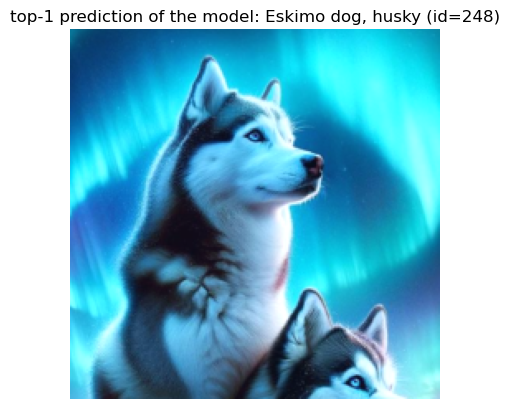

In [17]:
# imshow given image from our datasets.
index_of_chosen_img = 44
heatmap.plot_image(custom_model, stack_gen_data, idx = index_of_chosen_img)

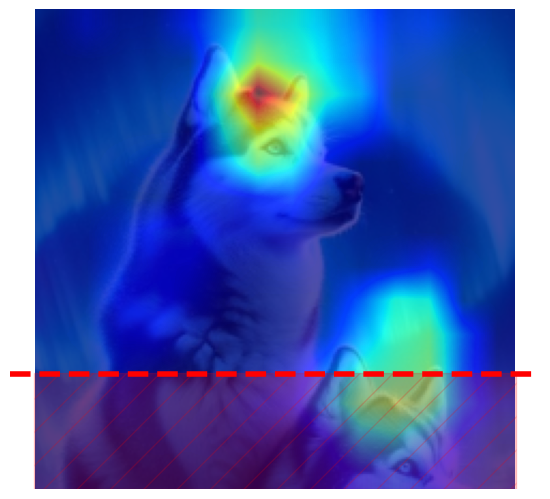

In [ ]:
# gradcam upscaled (bilinear) with the red zone being unseen by VGG16 (meaning the network's prediction is invariant to this area)
# If the red area is highlighted, then its bad as the network doesnt use this for the prediction!
heatmap.plot_heatmap_with_wall(cam_heatmap_stack_gen, stack_gen_data, idx = index_of_chosen_img)

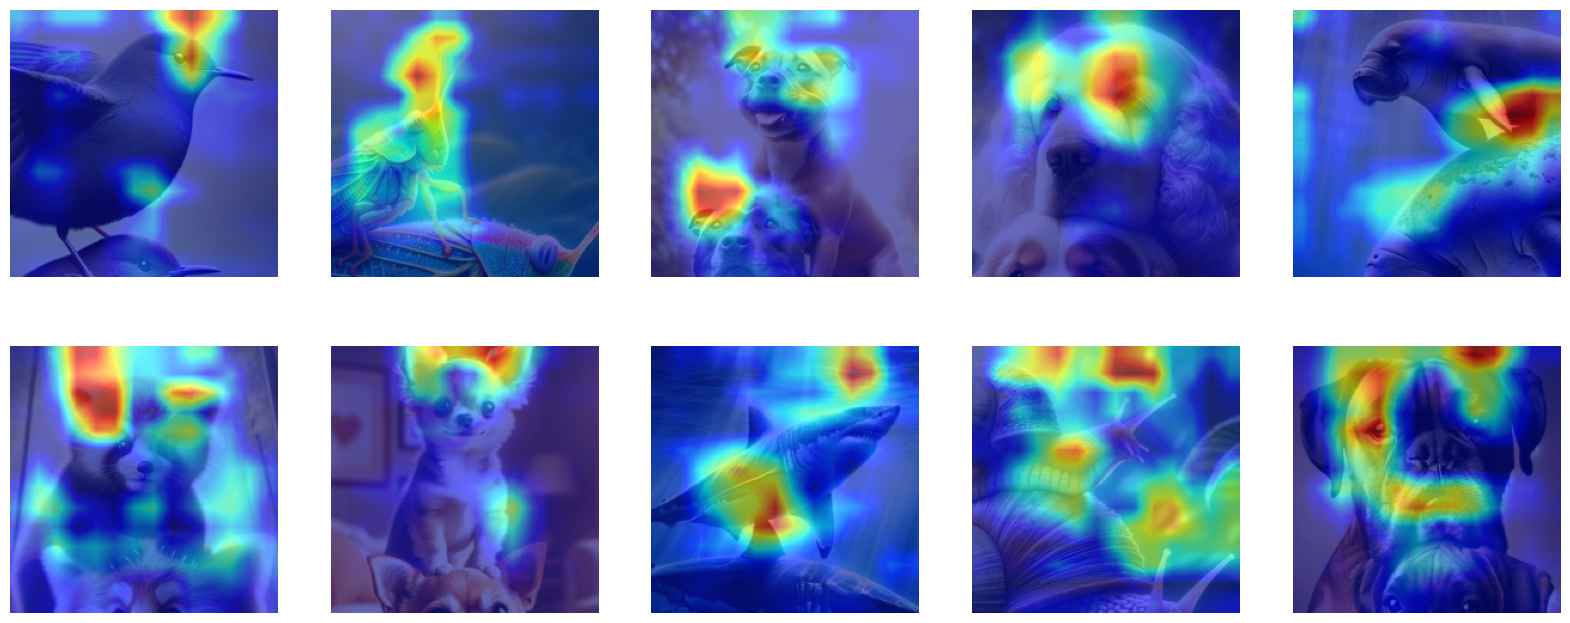

In [7]:
# Plot 10 random saliency maps for our STACK-GEN.
heatmap.plot_10_random_heatmaps(cam_heatmap_stack_gen, stack_gen_data)

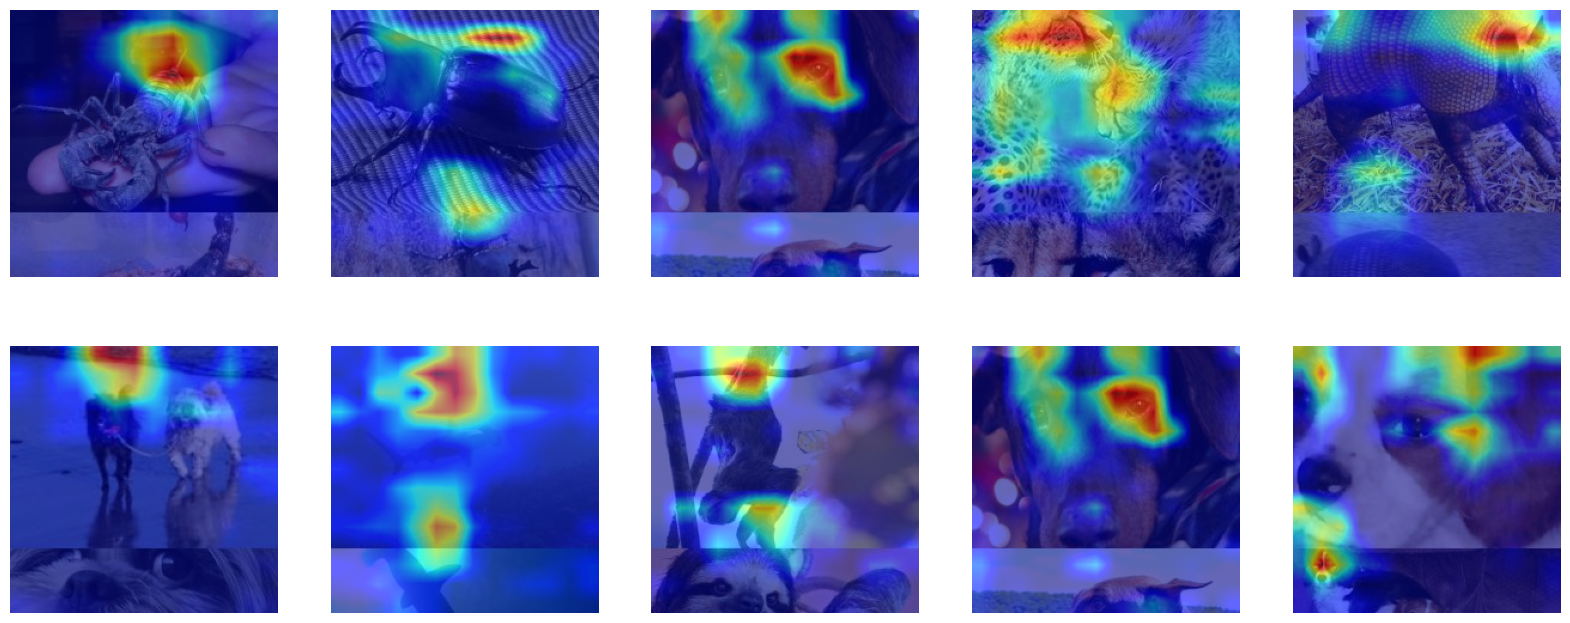

In [8]:
# Plot 10 random saliency maps for our STACK-MIX.
heatmap.plot_10_random_heatmaps(cam_heatmap_stack_mix, stack_mix_data)

In [9]:
# convert heatmap to tensor
grayscale_cam = torch.tensor(cam_heatmap_stack_gen)

# l2-norm of dead zone divided by whole l2-norm of saliency map as in Table 1 of our paper
norms = torch.norm(grayscale_cam[:, -54:, :], dim = (1,2)) / torch.norm(grayscale_cam, dim = (1,2))

print(f"activation in the deadzone/wall: mean = {torch.mean(norms).item():.2f}, std = {torch.std(norms).item():.2f}")

activation in the deadzone/wall: mean = 0.22, std = 0.12
